## 利用数据透视表统计分析销售数据

In [2]:
# coding:utf8
import pandas as pd
import numpy as np

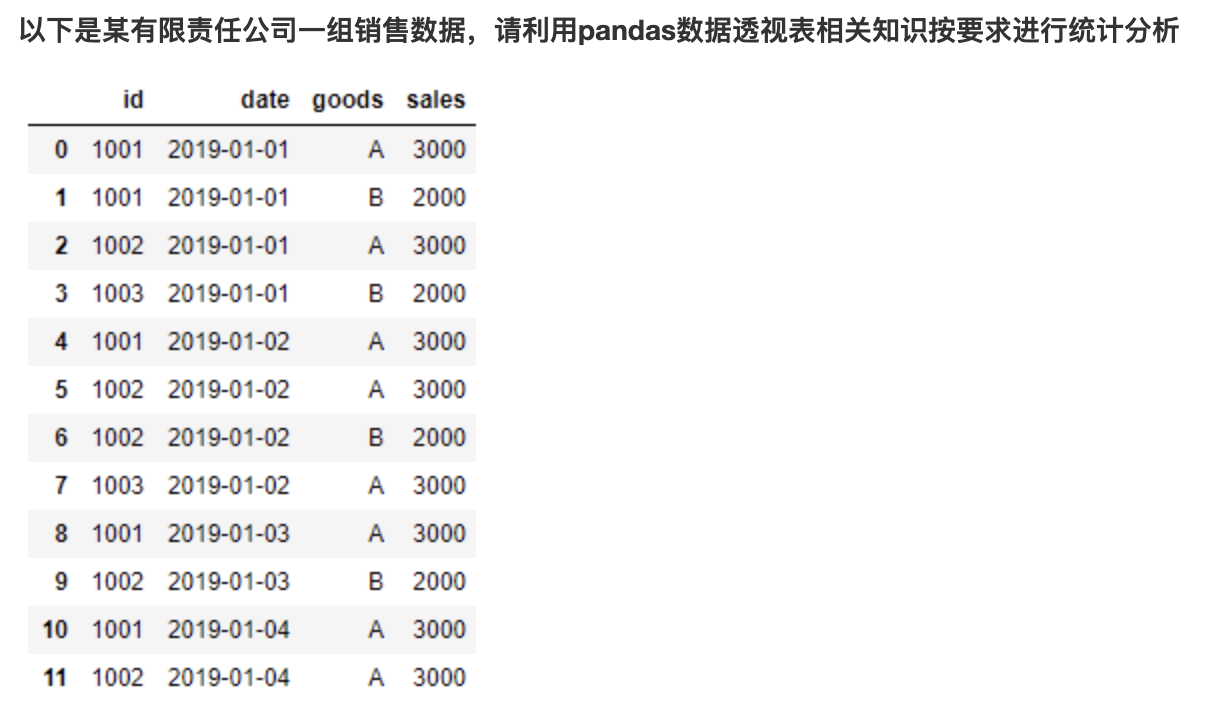

#### 将上方数据表建立 DataFrame 进行存储（阅读参考文章①）
>Pandas数据结构：5种Dataframe创建方式 https://zhuanlan.zhihu.com/p/37856914

In [3]:
data_list = [{'id':1001,'date':'2019-01-01','goods':'A','sales':3000},
            {'id':1001,'date':'2019-01-01','goods':'B','sales':2000},
            {'id':1002,'date':'2019-01-01','goods':'A','sales':3000},
            {'id':1003,'date':'2019-01-01','goods':'B','sales':2000},
            {'id':1001,'date':'2019-01-02','goods':'A','sales':3000},
            {'id':1002,'date':'2019-01-02','goods':'A','sales':3000},
            {'id':1002,'date':'2019-01-02','goods':'B','sales':2000},
            {'id':1003,'date':'2019-01-02','goods':'A','sales':3000},
            {'id':1001,'date':'2019-01-03','goods':'A','sales':3000},
            {'id':1002,'date':'2019-01-03','goods':'B','sales':2000},
            {'id':1001,'date':'2019-01-04','goods':'A','sales':3000},
            {'id':1002,'date':'2019-01-04','goods':'A','sales':3000}]
df = pd.DataFrame(data_list)
df

,id,date,goods,sales
0,1001,2019-01-01,A,3000
1,1001,2019-01-01,B,2000
2,1002,2019-01-01,A,3000
3,1003,2019-01-01,B,2000
4,1001,2019-01-02,A,3000
5,1002,2019-01-02,A,3000
6,1002,2019-01-02,B,2000
7,1003,2019-01-02,A,3000
8,1001,2019-01-03,A,3000
9,1002,2019-01-03,B,2000


#### 利用 pivot_table 统计该企业每个人每天销售商品 A 和 B 的金额之和（阅读参考文章②④⑤）
>Pandas透视表（pivot_table）详解 https://www.cnblogs.com/onemorepoint/p/8425300.html

>Pandas_数据透视表与交叉表 https://blog.csdn.net/rookie_is_me/article/details/88634474

>Pandas透视表和交叉表 https://blog.csdn.net/hustqb/article/details/78086394

In [15]:
# pd.pivot_table(df,index=['id'],columns=['date'],aggfunc=np.sum,fill_value=0)
df.pivot_table(index=['id'],values=['sales'],columns=['date'],aggfunc=[np.sum],fill_value=0)
# df.pivot_table(index='id',values=['sales'],columns='date',aggfunc=np.sum,fill_value=0)

sum                                 
          sales                                 
date 2019-01-01 2019-01-02 2019-01-03 2019-01-04
id                                              
1001       5000       3000       3000       3000
1002       3000       5000       2000       3000
1003       2000       3000          0          0

#### 请将上面的统计数据再增加一列，统计出每个人的销售总金额（阅读参考文章②④⑤）

In [18]:
df.pivot_table(index=['id'],columns=['date'],values=['sales'],fill_value=0,aggfunc=sum,margins=True,margins_name='销售总金额')

sales                                        
date  2019-01-01 2019-01-02 2019-01-03 2019-01-04  销售总金额
id                                                      
1001        5000       3000       3000       3000  14000
1002        3000       5000       2000       3000  13000
1003        2000       3000          0          0   5000
销售总金额      10000      11000       5000       6000  32000

***

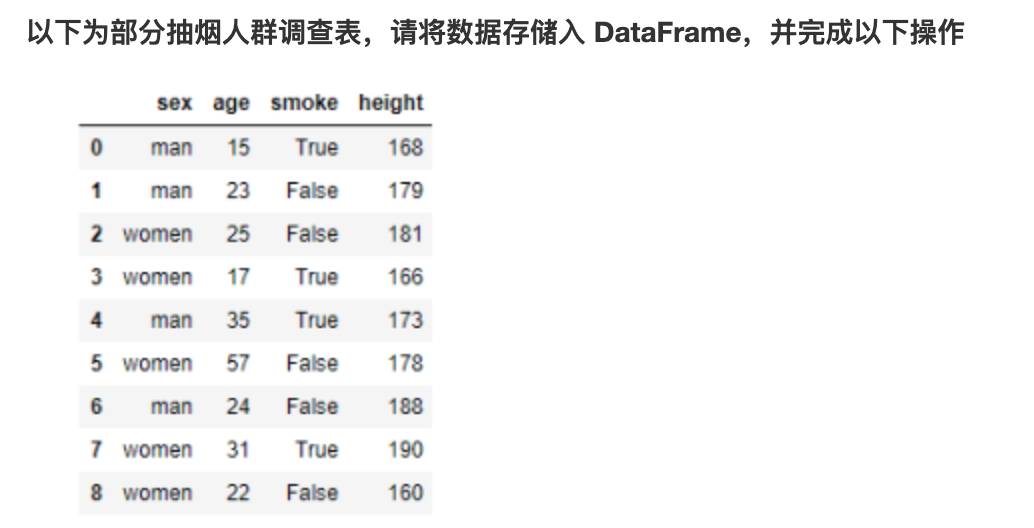

#### 请将以上数据存入 DataFrame 中（阅读参考文章①）
>Pandas数据结构：5种Dataframe创建方式 https://zhuanlan.zhihu.com/p/37856914

In [19]:
data = pd.DataFrame([['man',15,'True',168],['man',23,'False',179],['woman',25,'False',181],['woman',17,'True',166],
                     ['man',35,'True',173],['woman',57,'False',178],['man',24,'False',188],['woman',31,'True',190],
                    ['woman',22,'False',160]],columns=['sex','age','smoke','height'])
data

,sex,age,smoke,height
0,man,15,True,168
1,man,23,False,179
2,woman,25,False,181
3,woman,17,True,166
4,man,35,True,173
5,woman,57,False,178
6,man,24,False,188
7,woman,31,True,190
8,woman,22,False,160


#### 请以性别为分组依据，查看男女抽烟平均年龄和身高（阅读参考文章①）
>Pandas数据结构：5种Dataframe创建方式 https://zhuanlan.zhihu.com/p/37856914

In [21]:
# data.loc[data['smoke']=='True'].groupby(['sex','smoke'])['age','height'].agg([('平均值','mean')])
data.loc[data['smoke']=='True'].pivot_table(index='sex',values=['age','height'],columns='smoke',aggfunc=np.mean)
#  aggfunc默认的方法是 numpy.mean 求平均值

,age,height
smoke,True,True
sex,,
man,25,170.5
woman,24,178.0


#### 利用交叉表知识，统计各个性别抽烟的人数（阅读参考文章③④⑤）
>③pandas.crosstab函数 https://zhuanlan.zhihu.com/p/87779412

>④Pandas_数据透视表与交叉表 https://blog.csdn.net/rookie_is_me/article/details/88634474

>⑤Pandas透视表和交叉表 https://blog.csdn.net/hustqb/article/details/78086394

In [60]:
# crosstab(index, columns, values, rownames, colnames, aggfunc, margins, margins_name, dropna, normalize)
# pivot_table(self, values, index, columns, aggfunc, fill_value, margins, dropna, margins_name, observed)
# crosstab与pivot_table 对比(self)
pd.crosstab(data.sex,data.smoke[data.smoke=='True'])
# aggfunc cannot be used without values; values cannot be used without an aggfunc.
# pd.crosstab(data['sex'],data.loc[data['smoke']=='True']['smoke'])

smoke,True
sex,
man,2
woman,2


#### 利用交叉表知识，统计各个年龄段抽烟人情况（阅读参考文章③④⑤）
>③pandas.crosstab函数 https://zhuanlan.zhihu.com/p/87779412

>④Pandas_数据透视表与交叉表 https://blog.csdn.net/rookie_is_me/article/details/88634474

>⑤Pandas透视表和交叉表 https://blog.csdn.net/hustqb/article/details/78086394

In [62]:
pd.crosstab(data.age,data.smoke)

smoke,False,True
age,,
15,0,1
17,0,1
22,1,0
23,1,0
24,1,0
25,1,0
31,0,1
35,0,1
57,1,0
